# Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/workspace/deep_birth_death/src')

In [3]:
from evaluation.empirical_prediction import show_class_prediction, show_reg_prediction
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import os
from ete3 import Tree

In [4]:
models_path = "/workspace/deep_birth_death/deep_learning/models/"
empirical_path = "/workspace/deep_birth_death/empirical/"
temperature_path = "/workspace/deep_birth_death/deep_learning/temperatures/"

# Diversification scenario prediction

### Eucalypts

In [8]:
show_class_prediction(empirical_path + "eucalypts.nwk", models_path, temperature_path)

100%|██████████| 1/1 [00:00<00:00, 11.22it/s]


1  trees loaded
----- No temperature model prediction -----
BD: 0.0000
HE: 0.0000
ME: 0.0000
DD: 0.0000
SR: 1.0000
WW: 0.0000
----- Temperature model prediction -----
BD: 0.0000
HE: 0.0000
ME: 0.0000
DD: 0.0000
SR: 1.0000
WW: 0.0000
----- Temperature model + MCMC Dropout prediction -----
BD: 0.0000
HE: 0.0000
ME: 0.0012
DD: 0.0000
SR: 0.9944
WW: 0.0044
--- Classification Inference time: 47.850809812545776 seconds ---


### Conifers

In [10]:
show_class_prediction(empirical_path + "conifers.nwk", models_path, temperature_path)

100%|██████████| 1/1 [00:00<00:00, 16.54it/s]


1  trees loaded
----- No temperature model prediction -----
BD: 0.0000
HE: 0.0000
ME: 0.0013
DD: 0.0000
SR: 0.9987
WW: 0.0000
----- Temperature model prediction -----
BD: 0.0000
HE: 0.0000
ME: 0.0044
DD: 0.0000
SR: 0.9956
WW: 0.0000
----- Temperature model + MCMC Dropout prediction -----
BD: 0.0000
HE: 0.0041
ME: 0.0180
DD: 0.0000
SR: 0.9777
WW: 0.0001
--- Classification Inference time: 36.28173828125 seconds ---


### Cetaceans

In [5]:
show_class_prediction(empirical_path + "cetaceans.nwk", models_path, temperature_path)

100%|██████████| 1/1 [00:00<00:00, 62.12it/s]
/workspace/deep_birth_death/src/dataset_code/utilities_vec.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  trees_vec_res = np.array(trees_vec_res)


1  trees loaded
----- No temperature model prediction -----
BD: 0.3881
HE: 0.0074
ME: 0.0074
DD: 0.0000
SR: 0.5971
WW: 0.0001
----- Temperature model prediction -----
BD: 0.3560
HE: 0.0109
ME: 0.0059
DD: 0.0000
SR: 0.6269
WW: 0.0003
----- Temperature model + MCMC Dropout prediction -----
BD: 0.3788
HE: 0.0154
ME: 0.0104
DD: 0.0001
SR: 0.5905
WW: 0.0048
--- Classification Inference time: 29.867960453033447 seconds ---


# Diversification parameters estimation

### Eucalypts 

In [8]:
data, preds, mean_pred, std_pred = show_reg_prediction(empirical_path + "eucalypts.nwk", 'SR', models_path)
print(data)

100%|██████████| 1/1 [00:00<00:00, 15.29it/s]


1  trees loaded
AAAAAAAAAAAAAAAAAAAAAA
(1, 674)
--- Regression Inference time 7.422030448913574 seconds ---
  Parameter  Predicted value
0        r0         0.319068
1        r1         0.009697
2        a0         0.265911
3        a1         0.664928
4      time         1.383625


#### Confidence intervals for eucalypts

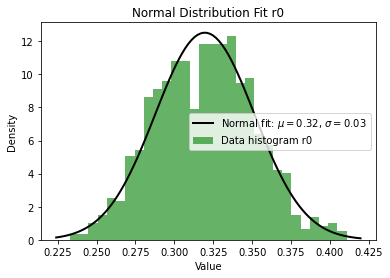

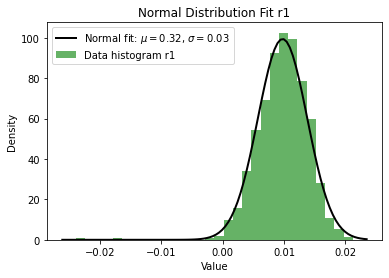

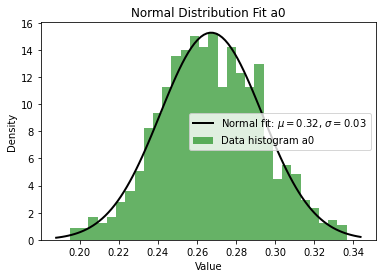

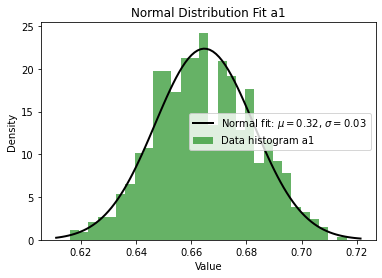

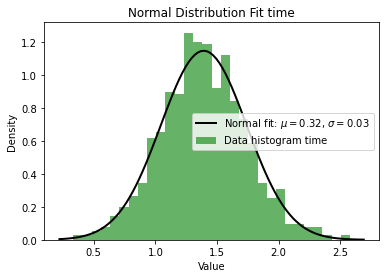

In [12]:
for i, param in enumerate(data["Parameter"]):
    
    # Plot the histogram of the data
    plt.hist(preds[:,:,i], bins=30, density=True, alpha=0.6, color='g', label='Data histogram' + " " + param)
    
    # Generate a range of values from min to max for plotting the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = stats.norm.pdf(x, mean_pred[0][i], std_pred[0][i])
    
    # Plot the normal distribution (PDF) using the computed mean and std dev
    plt.plot(x, pdf, 'k', linewidth=2, label=f'Normal fit: $\mu={mean_pred[0][0]:.2f}$, $\sigma={std_pred[0][0]:.2f}$')
    
    plt.title("Normal Distribution Fit" + " " + param)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    file_path = "/workspace/deep_birth_death/empirical/eucalypts_CI/"
    os.makedirs(file_path, exist_ok=True)
    plt.savefig(file_path + param + "_" + "95_CI_empirical_inference_eucalypts.pdf")
    plt.show()

### Conifers

In [16]:
data, preds, mean_pred, std_pred = show_reg_prediction(empirical_path + "conifers.nwk", 'SR', models_path)
print(data)

100%|██████████| 1/1 [00:00<00:00, 16.43it/s]
/workspace/deep_birth_death/src/dataset_code/utilities_vec.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  trees_vec_res = np.array(trees_vec_res)


1  trees loaded
--- Regression Inference time 5.722115993499756 seconds ---
  Parameter  Predicted value
0        r0         0.075930
1        r1         0.005670
2        a0         0.296826
3        a1         0.701566
4      time         0.506756


#### Confidence intervlals for conifers

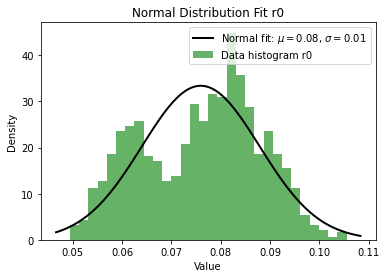

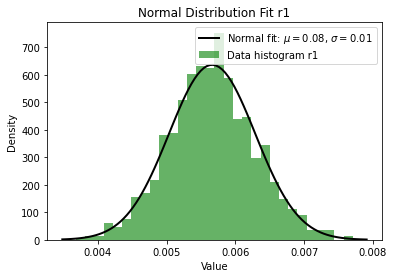

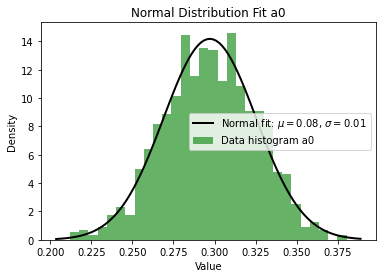

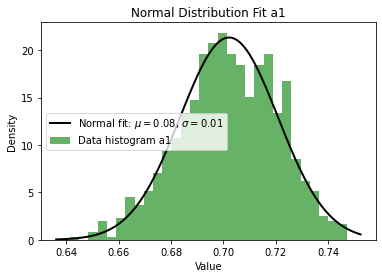

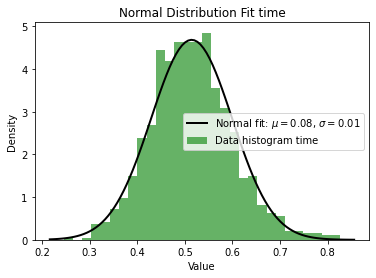

In [15]:
for i, param in enumerate(data["Parameter"]):
    
    # Plot the histogram of the data
    plt.hist(preds[:,:,i], bins=30, density=True, alpha=0.6, color='g', label='Data histogram' + " " + param)
    
    # Generate a range of values from min to max for plotting the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = stats.norm.pdf(x, mean_pred[0][i], std_pred[0][i])
    
    # Plot the normal distribution (PDF) using the computed mean and std dev
    plt.plot(x, pdf, 'k', linewidth=2, label=f'Normal fit: $\mu={mean_pred[0][0]:.2f}$, $\sigma={std_pred[0][0]:.2f}$')
    
    plt.title("Normal Distribution Fit" + " " + param)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    file_path = "/workspace/deep_birth_death/empirical/conifers_CI/"
    os.makedirs(file_path, exist_ok=True)
    plt.savefig(file_path + param + "_" + "95_CI_empirical_inference_conifers.pdf")
    plt.show()

### Cetaceans

In [6]:
data, preds, mean_pred, std_pred = show_reg_prediction(empirical_path + "cetaceans.nwk", 'SR', models_path)
print(data)

100%|██████████| 1/1 [00:00<00:00, 52.76it/s]


1  trees loaded
--- Regression Inference time 5.325092792510986 seconds ---
  Parameter  Predicted value
0        r0         0.172880
1        r1         0.016306
2        a0         0.226529
3        a1         0.738013
4      time         1.809475


#### COnfidence intervals for cetaceans

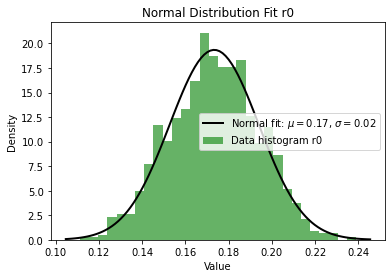

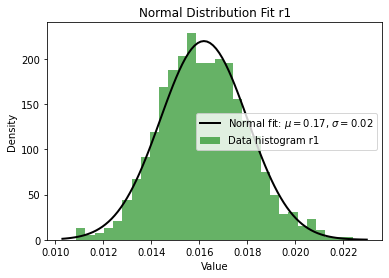

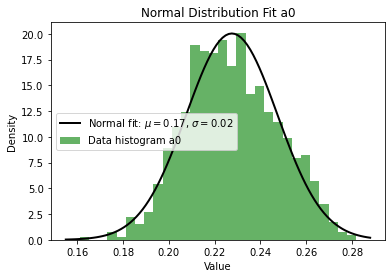

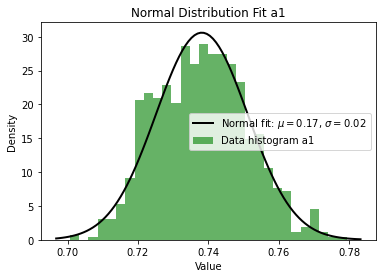

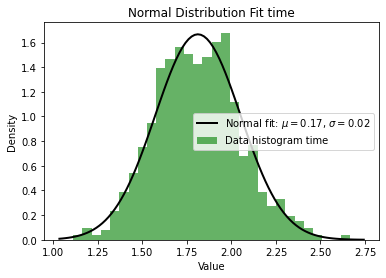

In [7]:
for i, param in enumerate(data["Parameter"]):
    
    # Plot the histogram of the data
    plt.hist(preds[:,:,i], bins=30, density=True, alpha=0.6, color='g', label='Data histogram' + " " + param)
    
    # Generate a range of values from min to max for plotting the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = stats.norm.pdf(x, mean_pred[0][i], std_pred[0][i])
    
    # Plot the normal distribution (PDF) using the computed mean and std dev
    plt.plot(x, pdf, 'k', linewidth=2, label=f'Normal fit: $\mu={mean_pred[0][0]:.2f}$, $\sigma={std_pred[0][0]:.2f}$')
    
    plt.title("Normal Distribution Fit" + " " + param)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    file_path = "/workspace/deep_birth_death/empirical/cetaceans_CI/"
    os.makedirs(file_path, exist_ok=True)
    plt.savefig(file_path + param + "_" + "95_CI_empirical_inference_cetaceans.pdf")
    plt.show()

In [11]:
data, preds, mean_pred, std_pred = show_reg_prediction(empirical_path + "cetaceans.nwk", 'BD', models_path)
print(data)

100%|██████████| 1/1 [00:00<00:00, 45.23it/s]


1  trees loaded
<class 'str'>
--- Regression Inference time 3.7701404094696045 seconds ---
  Parameter  Predicted value
0         r         0.097991
1         a         0.129599


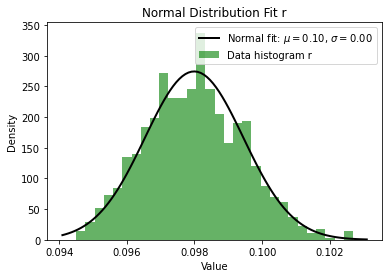

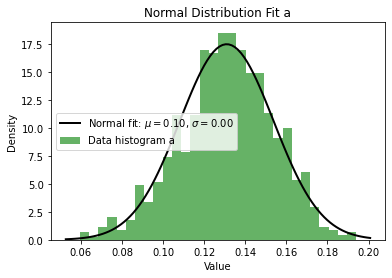

In [12]:
for i, param in enumerate(data["Parameter"]):
    
    # Plot the histogram of the data
    plt.hist(preds[:,:,i], bins=30, density=True, alpha=0.6, color='g', label='Data histogram' + " " + param)
    
    # Generate a range of values from min to max for plotting the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = stats.norm.pdf(x, mean_pred[0][i], std_pred[0][i])
    
    # Plot the normal distribution (PDF) using the computed mean and std dev
    plt.plot(x, pdf, 'k', linewidth=2, label=f'Normal fit: $\mu={mean_pred[0][0]:.2f}$, $\sigma={std_pred[0][0]:.2f}$')
    
    plt.title("Normal Distribution Fit" + " " + param)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()